# Exploratory Analysis
In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. First, I combined the various LGBT related biases into one as 'Anti-LGBT'. I also, cleaned up some other biases to make the entire column uniform as possible. Second, I cleaned the offender ethnicity column for the same reason. The resulting dataset lists 56 separate alleged hate crimes, in Austin, TX, since 2017. 

Out of the total number of reported, alleged incidents, 32.14% were directed at the LGBT Community. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Importing & examining the cleaned dataset
df = pd.read_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final_clean.csv")
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
print(df.shape)

,date,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_ethnicity
0,2017-01-01,Anti-African American,1,0,1,0,Aggravated Assault,Park/Playground,Caucasian
1,2017-02-01,Anti-Caucasian,1,0,1,0,Aggravated Assault,Street/Alley,African American
2,2017-03-21,Anti-Jewish,0,0,0,0,Destruction,Street/Alley,Unknown
3,2017-04-12,Anti-Jewish,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,Caucasian
4,2017-05-15,Anti-LGBT,2,1,0,1,Simple Assault,Residence/Home,Caucasian


----------------------------------


,date,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_ethnicity
51,2020-03-22,Anti-Jewish,0,0,1,0,Criminal Mischief,Residence/Home,Unknown
52,2020-04-20,Anti-Buddhist,0,0,1,0,Criminal Mischief,Place of Worship,Unknown
53,2020-04-29,Anti-LGBT,1,0,1,0,Assault by Threat,Department/Discount Store,African American
54,2020-05-17,Anti-African American,1,0,1,0,Assault by Contact,Convenience Store,Caucasian
55,2020-05-20,Anti-Hispanic,1,0,1,0,Assault with Injury,Street/Alley,Caucasian


----------------------------------
(56, 9)


In [3]:
# Creating an index from the dates and performing the necessary conversions
df['date'] = df['date'].astype('datetime64')
df = df.set_index('date')
df['bias'] = df['bias'].astype('category')
df['offense'] = df['offense'].astype('category')
df['offense_location'] = df['offense_location'].astype('category')
df['offender_ethnicity'] = df['offender_ethnicity'].astype('category')

# Reexamining the dataset
display(df.index)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018-02-22', '2018-03-02', '2018-03-06', '2018-03-08',
               '2018-04-01', '2018-04-30', '2018-05-21', '2018-06-16',
               '2018-06-28', '2018-08-13', '2018-08-25', '2018-09-09',
               '2018-09-11', '2018-10-11', '2018-10-19', '2018-12-15',
               '2018-12-29', '2019-01-19', '2019-02-22', '2019-03-31',
               '2019-04-04', '2019-06-11', '2019-08-06', '2019-08-12',
               '2019-08-24', '2019-11-23', '2019-12-19', '2019-12-30',
               '2020-03-01', '2020-03-08', '2020-03-22', '2020-03-22',
               '2020-04-20', '2020-04-29', '2020-05-17', '2020-05-20'],
     

----------------------------------


,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_ethnicity
date,,,,,,,,
2017-01-01,Anti-African American,1,0,1,0,Aggravated Assault,Park/Playground,Caucasian
2017-02-01,Anti-Caucasian,1,0,1,0,Aggravated Assault,Street/Alley,African American
2017-03-21,Anti-Jewish,0,0,0,0,Destruction,Street/Alley,Unknown
2017-04-12,Anti-Jewish,0,0,0,0,Simple Assault,Air/Bus/Train Terminal,Caucasian
2017-05-15,Anti-LGBT,2,1,0,1,Simple Assault,Residence/Home,Caucasian


----------------------------------


,bias,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,offense,offense_location,offender_ethnicity
date,,,,,,,,
2020-03-22,Anti-Jewish,0,0,1,0,Criminal Mischief,Residence/Home,Unknown
2020-04-20,Anti-Buddhist,0,0,1,0,Criminal Mischief,Place of Worship,Unknown
2020-04-29,Anti-LGBT,1,0,1,0,Assault by Threat,Department/Discount Store,African American
2020-05-17,Anti-African American,1,0,1,0,Assault by Contact,Convenience Store,Caucasian
2020-05-20,Anti-Hispanic,1,0,1,0,Assault with Injury,Street/Alley,Caucasian


We'll look at the numerical data in the victims & offenders columns later. First, I want to explore the categorical data.

### Question 1. How are reported incidences in Austin distributed according to motivation? 

Anti-LGBT                18
Anti-African American    18
Anti-Hispanic             7
Anti-Muslim               4
Anti-Jewish               4
Anti-Caucasian            3
Anti-Disability           1
Anti-Buddhist             1
Name: bias, dtype: int64

----------------------------------


Anti-LGBT                0.321429
Anti-African American    0.321429
Anti-Hispanic            0.125000
Anti-Muslim              0.071429
Anti-Jewish              0.071429
Anti-Caucasian           0.053571
Anti-Disability          0.017857
Anti-Buddhist            0.017857
Name: bias, dtype: float64

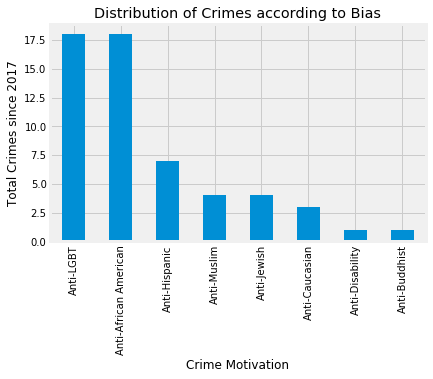

In [4]:
# Creating a dataframe of the biases
bias = df['bias'].value_counts()
display(bias)

# Displaying the bias values as proportions
print('----------------------------------')
display(df['bias'].value_counts(normalize=True))

# Visualizing the bias dataframe
bias.plot.bar()
plt.xlabel('Crime Motivation')
plt.ylabel('Total Crimes since 2017')
plt.title('Distribution of Crimes according to Bias')
plt.show()

### Question 2. How are the offense-types distributed? 

Assault                21
Simple Assault          8
Intimidation            7
Criminal Mischief       5
Vandalism               4
Aggravated Assault      3
Destruction             2
Theft                   1
Robbery                 1
Burglary/Assault        1
Assault with Injury     1
Assault by Threat       1
Assault by Contact      1
Name: offense, dtype: int64

----------------------------------


Assault                0.375000
Simple Assault         0.142857
Intimidation           0.125000
Criminal Mischief      0.089286
Vandalism              0.071429
Aggravated Assault     0.053571
Destruction            0.035714
Theft                  0.017857
Robbery                0.017857
Burglary/Assault       0.017857
Assault with Injury    0.017857
Assault by Threat      0.017857
Assault by Contact     0.017857
Name: offense, dtype: float64

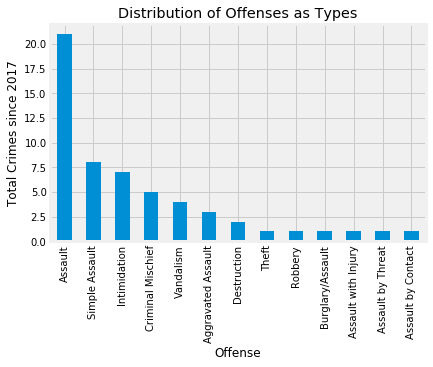

In [5]:
# Create a dataframe for the offense values
offense_count = df.offense.value_counts()
display(offense_count)

# Displaying the offense values as proportions
print('----------------------------------')
display(df.offense.value_counts(normalize=True))


# Plotting the offense values
offense_count.plot.bar()
plt.xlabel('Offense')
plt.ylabel('Total Crimes since 2017')
plt.title('Distribution of Offenses as Types')
plt.show()

### Question 3. How are the offenders distributed according to race/ethnicity?      

Caucasian                    26
Hispanic                     12
Unknown                      11
African American              5
Hispanic (2) Caucasian(2)     1
Asian                         1
Name: offender_ethnicity, dtype: int64

----------------------------------


Caucasian                    0.464286
Hispanic                     0.214286
Unknown                      0.196429
African American             0.089286
Hispanic (2) Caucasian(2)    0.017857
Asian                        0.017857
Name: offender_ethnicity, dtype: float64

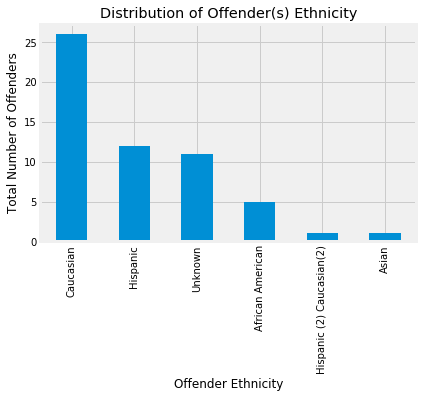

In [9]:
# Create a dataframe for the offender ethnicity values
offenders_count = df['offender_ethnicity'].value_counts()
display(offenders_count)
print('----------------------------------')

# Displaying the offender ethnicity values as proportions
display(df.offender_ethnicity.value_counts(normalize=True))

# Visualizing the offender ethnicity values
offenders_count.plot.bar()
plt.xlabel('Offender Ethnicity')
plt.ylabel('Total Number of Offenders')
plt.title('Distribution of Offender(s) Ethnicity')
plt.show()

Note...the above 'Offender' graph has an instance of 'Hispanic (2), Caucasian (2)' as a single column because of an incident that occurred on 1/19/19 https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective -- 2 of the offenders were white, and the other 2 were hispanic. 

### Question 4. How are the offenses (type) distributed? 

Street/Alley                        16
Residence/Home                      11
Bar/Nightclub                        5
Parking Lot/Garage                   5
Convenience Store                    4
Place of Worship                     2
Park/Playground                      2
Unknown                              1
Drug Store/Dr.'s office/Hospital     1
Bank/Savings and Loan                1
Department/Discount Store            1
Parking Lot                          1
Hotel/Motel                          1
Parking/Drop Lot                     1
Restaurant                           1
School-Elementary/Secondary          1
Shelter-Mission/Homeless             1
Air/Bus/Train Terminal               1
Name: offense_location, dtype: int64

----------------------------------


Street/Alley                        0.285714
Residence/Home                      0.196429
Bar/Nightclub                       0.089286
Parking Lot/Garage                  0.089286
Convenience Store                   0.071429
Place of Worship                    0.035714
Park/Playground                     0.035714
Unknown                             0.017857
Drug Store/Dr.'s office/Hospital    0.017857
Bank/Savings and Loan               0.017857
Department/Discount Store           0.017857
Parking Lot                         0.017857
Hotel/Motel                         0.017857
Parking/Drop Lot                    0.017857
Restaurant                          0.017857
School-Elementary/Secondary         0.017857
Shelter-Mission/Homeless            0.017857
Air/Bus/Train Terminal              0.017857
Name: offense_location, dtype: float64

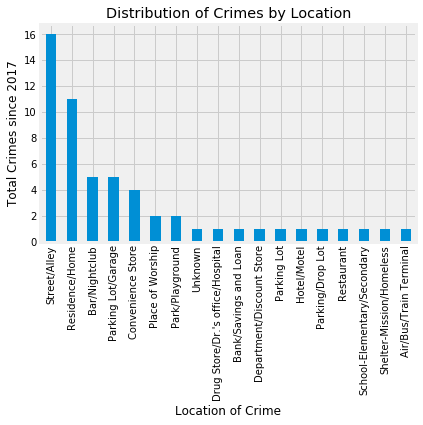

In [7]:
# Examining the 'offense location' column
location = df.offense_location.value_counts()
display(location)
print('----------------------------------')
# Displaying 'offense location' as percentages
display(df.offense_location.value_counts(normalize=True))

location.plot.bar()
plt.xlabel('Location of Crime')
plt.ylabel('Total Crimes since 2017')
plt.title('Distribution of Crimes by Location')
plt.show()

Interestingly, the 2nd highest percentage of crimes takes place within the home (19.64%). 

### Question 5. Any correlations? 

,number_of_offenders_over_18,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18
number_of_offenders_over_18,1.000000,-0.180482,0.342371,-0.005228
number_of_offenders_under_18,-0.180482,1.000000,-0.398025,0.572413
number_of_victims_over_18,0.342371,-0.398025,1.000000,-0.554402
number_of_victims_under_18,-0.005228,0.572413,-0.554402,1.000000


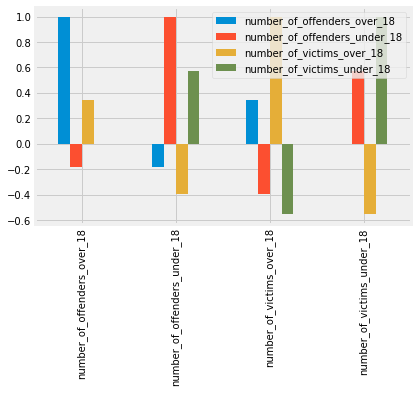

In [8]:
# Examining correlations between victims & offenders
df_corr = df.corr()

display(df_corr)
df_corr.plot.bar()
plt.show()